In [4]:
import pickle
import os

In [5]:
cd ../test_data

/Users/sashi/repos/ThinkChipBackend/test_data


In [6]:
k = os.listdir()
print(list(enumerate(k)))

[(0, '[f]assignment|141019_190516.pickle'), (1, '[f]eyes_closed|141019_160513.pickle'), (2, '[f]facebook|141019_160022.pickle'), (3, '[f]hcl_1|111019_142206.pickle'), (4, '[f]reading_research_paper_1|111019_145415.pickle'), (5, '[f]reading_research_paper_1|111019_150922.pickle'), (6, '[f]sashi_assignment|151019_140830.pickle'), (7, '[f]sashi_eyes_closed|151019_135421.pickle'), (8, '[f]social_media|111019_153856.pickle'), (9, 'call_of_duty.pickle'), (10, 'facebook.pickle'), (11, 'raghav_eyes_closed'), (12, 'SingleBlinksData')]


In [7]:
# Eyes Closed Data
with open(k[6],'rb') as f:
    data1 = pickle.load(f)

In [8]:
# Assignment Data
with open(k[7],'rb') as f:
    data2 = pickle.load(f)

In [9]:
# # Assignment data
# with open(k[0], 'rb') as f:
#     data3 = pickle.load(f)

/usr/local/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


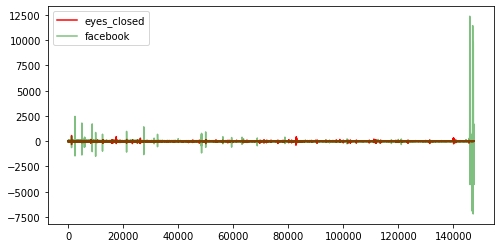

In [10]:
# Plot the filtered (DC and 50Hz notch) data without removing bad epochs
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(8,4))
plt.plot(data1[10:,0,:].reshape(-1), 'r', alpha=1, label='eyes_closed')
plt.plot(data2[10:,0,:].reshape(-1), 'g', alpha=0.5, label='facebook')
#plt.plot(data3[10:,0,:].reshape(-1), 'g', alpha=0.5, label='Assignment')
plt.legend()

In [11]:
import sys
sys.path.append('../')

In [12]:
from features import feature_removal as fr

In [13]:
# Removing bad epochs containing eye blinks
import config
config.reset_filter_states() # Why do we need to reset filter states?
out1 = fr.remove_bad_epochs(data1,fr.energy_of_epoch,threshold=400)
config.reset_filter_states()
out2 = fr.remove_bad_epochs(data2,fr.energy_of_epoch,400)
# config.reset_filter_states()
# out3 = fr.remove_bad_epochs(data3,fr.energy_of_epoch,400)

CONSOLE: ENEGERGY: 242814.1634289853
CONSOLE: ENEGERGY: 40290.10542153404
CONSOLE: ENEGERGY: 4974.711379585052
CONSOLE: ENEGERGY: 186.57025059813236
CONSOLE: ENEGERGY: 32.475027086917144
CONSOLE: ENEGERGY: 58.724025844903196
CONSOLE: ENEGERGY: 37.54299039305003
CONSOLE: ENEGERGY: 29.380351731710775
CONSOLE: ENEGERGY: 49.71063207554442
CONSOLE: ENEGERGY: 25.149488422592228
CONSOLE: ENEGERGY: 42.50106017769172
CONSOLE: ENEGERGY: 64.88803102325905
CONSOLE: ENEGERGY: 88.20851692782973
CONSOLE: ENEGERGY: 48.94890017008146
CONSOLE: ENEGERGY: 61.50071322563116
CONSOLE: ENEGERGY: 61.29937286798452
CONSOLE: ENEGERGY: 44.40283115095513
CONSOLE: ENEGERGY: 47.85386741903526
CONSOLE: ENEGERGY: 32.41995506514428
CONSOLE: ENEGERGY: 46.253928375107485
CONSOLE: ENEGERGY: 140.53360951026494
CONSOLE: ENEGERGY: 73.10979050328923
CONSOLE: ENEGERGY: 53.23575007909791
CONSOLE: ENEGERGY: 22.2578281383054
CONSOLE: ENEGERGY: 22.67197886774109
CONSOLE: ENEGERGY: 33.45417001816709
CONSOLE: ENEGERGY: 27.2053086324

CONSOLE: ENEGERGY: 486542.00798278174
CONSOLE: ENEGERGY: 77814.53933080405
CONSOLE: ENEGERGY: 8236.526412577003
CONSOLE: ENEGERGY: 418.7481262841327
CONSOLE: ENEGERGY: 187.6976517123181
CONSOLE: ENEGERGY: 515.7414261543726
CONSOLE: ENEGERGY: 772.6427271328087
CONSOLE: ENEGERGY: 85.33453167981733
CONSOLE: ENEGERGY: 274.04472804203135
CONSOLE: ENEGERGY: 57.3292198773736
CONSOLE: ENEGERGY: 53.706264125660894
CONSOLE: ENEGERGY: 43.80967710863083
CONSOLE: ENEGERGY: 381.7210945107038
CONSOLE: ENEGERGY: 289.96076876428447
CONSOLE: ENEGERGY: 47.70718355994291
CONSOLE: ENEGERGY: 51.27966663823108
CONSOLE: ENEGERGY: 52.79161064440788
CONSOLE: ENEGERGY: 65.26818001028064
CONSOLE: ENEGERGY: 92.62011679775986
CONSOLE: ENEGERGY: 76.97690420291117
CONSOLE: ENEGERGY: 68.07926979348203
CONSOLE: ENEGERGY: 131.55998847796724
CONSOLE: ENEGERGY: 65.33009051581713
CONSOLE: ENEGERGY: 15.668494482498525
CONSOLE: ENEGERGY: 39.86430824710926
CONSOLE: ENEGERGY: 85.84321396398698
CONSOLE: ENEGERGY: 45.51669613937

In [15]:
out1.shape, out2.shape #out3.shape

((1135, 1, 250), (1162, 1, 250))

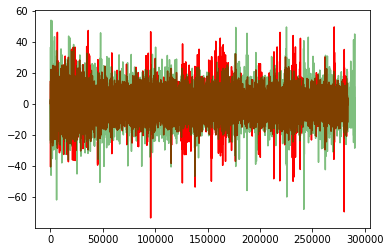

In [17]:
plt.plot(out1.squeeze().reshape(-1), 'r', alpha=1)
plt.plot(out2.squeeze().reshape(-1), 'g', alpha=0.5)
#plt.plot(out3.squeeze().reshape(-1),alpha=0.4)

In [18]:
out1.shape
#out2.shape
#out3.shape

(1135, 1, 250)

In [19]:
from features import *

In [22]:
bandpower1 = []
bandpower2 = []
bandpower3 = []
for o in out1:
    bandpower1.append(get_bandpower(o.reshape(1,o.shape[0],o.shape[1])))
for o in out2:
    bandpower2.append(get_bandpower(o.reshape(1,o.shape[0],o.shape[1])))
# for o in out3:
#     bandpower3.append(get_bandpower(o.reshape(1,o.shape[0],o.shape[1])))

In [23]:
bandpower1 = np.array(bandpower1)
bandpower2 = np.array(bandpower2)
# bandpower3 = np.array(bandpower3)
print(bandpower1.shape)
print(bandpower2.shape)
# print(bandpower3.shape)

(1135, 1, 5)
(1162, 1, 5)


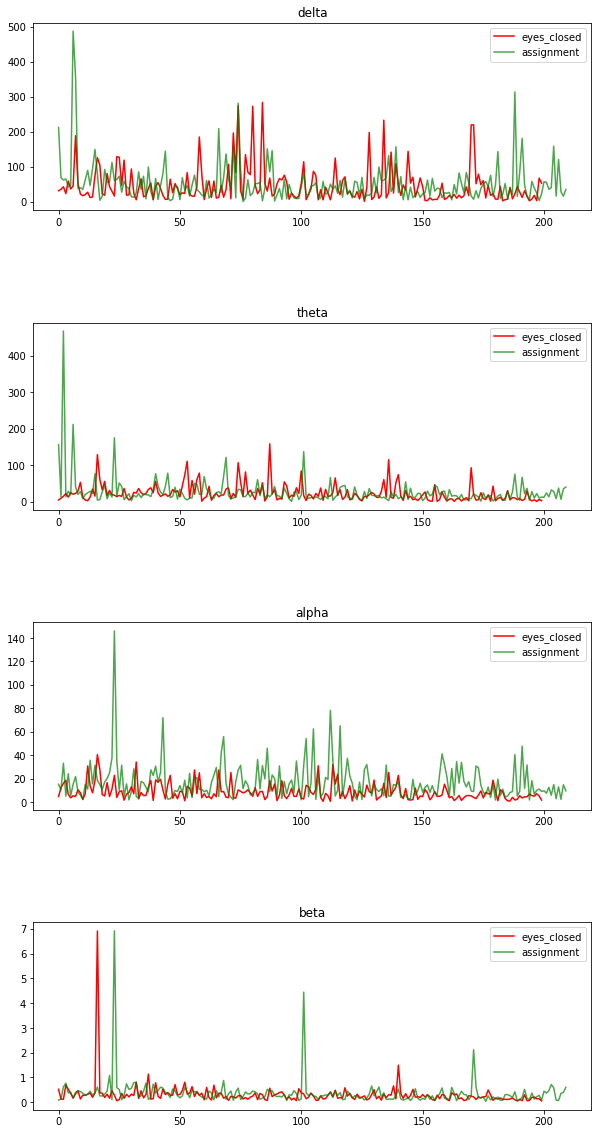

In [24]:
fig,ax = plt.subplots(4,1,figsize=(10,20))
fig.subplots_adjust(hspace=0.6)
bands = ['delta','theta','alpha','beta']

for i, a in enumerate(ax):
    a.plot(bandpower1[10:210,:,i].reshape(-1),c='r',label='eyes_closed', alpha=1)
    a.plot(bandpower2[0:210,:,i].reshape(-1),c='g',label='assignment', alpha=0.7)
#     a.plot(bandpower3[60:270,:,i].reshape(-1),c='g',label='assignment', alpha=0.5)
    a.set_title(bands[i])
    a.legend()

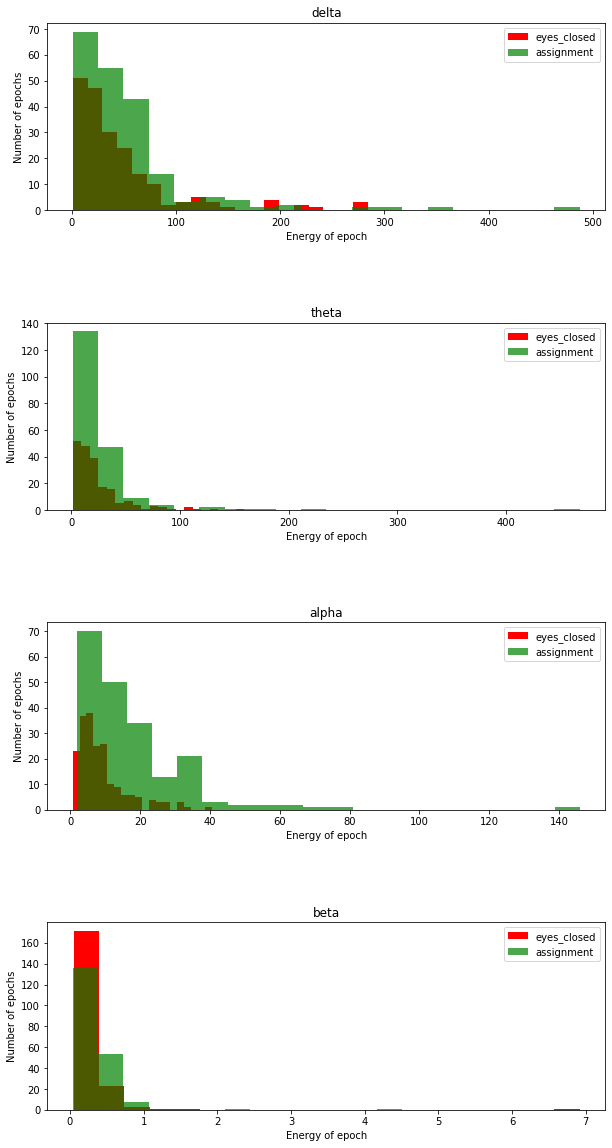

In [29]:
# Plot the histogram of bandpower to visualize the distribution of energy of each band
fig,ax = plt.subplots(4,1,figsize=(10,20))
fig.subplots_adjust(hspace=0.6)
bands = ['delta','theta','alpha','beta']

for i, a in enumerate(ax):
    a.hist(bandpower1[10:210,:,i].reshape(-1), bins=20, color='r',label='eyes_closed', alpha=1)
    a.hist(bandpower2[0:200,:,i].reshape(-1), bins=20, color='g',label='assignment', alpha=0.7)
#     a.hist(bandpower3[60:270,:,i].reshape(-1),color='g',label='assignment', alpha=0.5)
    a.set_title(bands[i])
    a.set_xlabel('Energy of epoch')
    a.set_ylabel('Number of epochs')
    a.legend()